# Project 3: Reddit NLP Classifier

## 1. Problem Statement:

In finance, the act of investing is to allocate money in the expectation of receiving some benefit in the future. For any good investor, it is expected that their initial investment will do well and return a handsome profit. The challenge however for most aspiring traders is choosing the right stock, and finding the best time to execute their orders.

While online investment forums (such as Reddit) have been very useful in assessing the "market sentiment" of different stocks types, investment opinions which are posted on these subchannels can vary widely based on their user profile and risk appetite. Blindly taking such financial advice without consideration of the background origins can therefore be very dangerous financially.

On Reddit, there are two popular subreddits that users can post their stock analysis and stock purchase decisions. These are:
    - r/wallstreetbets
    - r/investing

As their names imply, users on the r/wallstreetbets subreddit are of the high-risk/high-reward (almost reckless) category, whereas those on the r/investing channel tend to favour safer forms of investment portfolios. 

For the purposes of this project, I will be building a NLP classifier that will help us to distinguish the message posts between these two popular subreddits. By using the Reddit API, posts on these two subreddits will be scraped, processed and used to build our NLP classifier. This classifier will enable us savvy investors to now make informed investment decisions based on our desired investment objectives and risk appetites.

## 2. Executive Summary:

### Contents:
- [1. Problem Statement](#1.-Problem-Statement)
- [2. Executive Summary](#2.-Executive-Summary)
- [3. Importing the Libraries](#3.-Importing-the-Libraries)
- [4. Data Collection using APIs](#4.-Data-collection-using-APIs)
- [5. Data Cleaning and EDA](#5.-Data-Cleaning-and-EDA)
- [6. Data Preprocessing](#6.-Data-preprocessing)
- [7. Data Modelling](#7-Data-Modelling)
- [8. Analysis of Classification Results](#8.-Analysis-of-classification-results)
- [9. Conclusion and Recommendations](#9.-Conclusion-and-Recommendations)

## 3. Importing the Libraries:

In [1]:
import requests
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## 4. Data collection using APIs

### 4.1 Setting up the API

In [2]:
# Target web page:
url_1 = "https://www.reddit.com/r/wallstreetbets.json"
url_2 = "https://www.reddit.com/r/investing.json"

In [3]:
# Setting up the header
headers = {"User-agent": "JCYEO"}

In [4]:
# Establishing the connection
res1 = requests.get(url_1, headers=headers)
print(res1.status_code)
res2 = requests.get(url_2, headers=headers)
print(res2.status_code)

200
200


### 4.2 Retreiving and Navigating the JSON file

In [5]:
wsb_json = res1.json()   # wallstreetbets JSON
inv_json = res2.json()   # investing JSON

In [6]:
# Visual inspection of the JSON file to determine the message path
wsb_json

{'kind': 'Listing',
 'data': {'modhash': '',
  'dist': 27,
  'children': [{'kind': 't3',
    'data': {'approved_at_utc': None,
     'subreddit': 'wallstreetbets',
     'selftext': '[Daily Discussion Thread](https://www.reddit.com/r/wallstreetbets/search?q=flair_name%3A%22Daily%20Thread%22&amp;restrict_sr=1&amp;sort=new) - [DD](https://reddit.com/r/wallstreetbets/search?sort=new&amp;restrict_sr=on&amp;q=flair%3ADD) - [YOLO](https://reddit.com/r/wallstreetbets/search?sort=new&amp;restrict_sr=on&amp;q=flair%3AYOLO) - [Discussion](https://reddit.com/r/wallstreetbets/search?sort=new&amp;restrict_sr=on&amp;q=flair%3ADiscussion)\n\n[Weekly Earnings Discussion Thread](https://www.reddit.com/r/wallstreetbets/search?sort=new&amp;restrict_sr=on&amp;q=flair%3A%22Earnings%20Thread%22)\n\n[WSB Discord Chat](http://discord.gg/wallstreetbets)',
     'author_fullname': 't2_6l4z3',
     'saved': False,
     'mod_reason_title': None,
     'gilded': 0,
     'clicked': False,
     'title': 'What Are Your M

In [7]:
# The message data is contained within the ["data"]["children"] path
wsb_json["data"]["children"]   # this is a list of dictionaries

[{'kind': 't3',
  'data': {'approved_at_utc': None,
   'subreddit': 'wallstreetbets',
   'selftext': '[Daily Discussion Thread](https://www.reddit.com/r/wallstreetbets/search?q=flair_name%3A%22Daily%20Thread%22&amp;restrict_sr=1&amp;sort=new) - [DD](https://reddit.com/r/wallstreetbets/search?sort=new&amp;restrict_sr=on&amp;q=flair%3ADD) - [YOLO](https://reddit.com/r/wallstreetbets/search?sort=new&amp;restrict_sr=on&amp;q=flair%3AYOLO) - [Discussion](https://reddit.com/r/wallstreetbets/search?sort=new&amp;restrict_sr=on&amp;q=flair%3ADiscussion)\n\n[Weekly Earnings Discussion Thread](https://www.reddit.com/r/wallstreetbets/search?sort=new&amp;restrict_sr=on&amp;q=flair%3A%22Earnings%20Thread%22)\n\n[WSB Discord Chat](http://discord.gg/wallstreetbets)',
   'author_fullname': 't2_6l4z3',
   'saved': False,
   'mod_reason_title': None,
   'gilded': 0,
   'clicked': False,
   'title': 'What Are Your Moves Tomorrow, December 09',
   'link_flair_richtext': [{'e': 'text', 't': 'Daily Discussio

In [8]:
# This list of dictionaries is 27 rows long
len(wsb_json["data"]["children"])

27

In [9]:
# Locating the message path
wsb_json["data"]["children"][0]["data"]   

{'approved_at_utc': None,
 'subreddit': 'wallstreetbets',
 'selftext': '[Daily Discussion Thread](https://www.reddit.com/r/wallstreetbets/search?q=flair_name%3A%22Daily%20Thread%22&amp;restrict_sr=1&amp;sort=new) - [DD](https://reddit.com/r/wallstreetbets/search?sort=new&amp;restrict_sr=on&amp;q=flair%3ADD) - [YOLO](https://reddit.com/r/wallstreetbets/search?sort=new&amp;restrict_sr=on&amp;q=flair%3AYOLO) - [Discussion](https://reddit.com/r/wallstreetbets/search?sort=new&amp;restrict_sr=on&amp;q=flair%3ADiscussion)\n\n[Weekly Earnings Discussion Thread](https://www.reddit.com/r/wallstreetbets/search?sort=new&amp;restrict_sr=on&amp;q=flair%3A%22Earnings%20Thread%22)\n\n[WSB Discord Chat](http://discord.gg/wallstreetbets)',
 'author_fullname': 't2_6l4z3',
 'saved': False,
 'mod_reason_title': None,
 'gilded': 0,
 'clicked': False,
 'title': 'What Are Your Moves Tomorrow, December 09',
 'link_flair_richtext': [{'e': 'text', 't': 'Daily Discussion'}],
 'subreddit_name_prefixed': 'r/wallstr

In [10]:
# Parsing this dictionary into a pd.DataFrame. This is the correct format to scrape reddit
df1 = pd.DataFrame.from_dict(wsb_json["data"]["children"][0]["data"], orient="index").T
df1

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video
0,None,wallstreetbets,[Daily Discussion Thread](https://www.reddit.c...,t2_6l4z3,False,None,0,False,"What Are Your Moves Tomorrow, December 09","[{'e': 'text', 't': 'Daily Discussion'}]",...,None,/r/wallstreetbets/comments/e7zg4t/what_are_you...,no_ads,True,https://www.reddit.com/r/wallstreetbets/commen...,754144,1.57584e+09,0,None,False


In [11]:
# This format also works for r/investing
df2 = pd.DataFrame.from_dict(inv_json["data"]["children"][0]["data"], orient="index").T
df2

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video
0,None,investing,"Alright everyone, it looks like we had pretty ...",t2_p8vmm,False,None,0,False,Formal posting guidelines for political topics...,[],...,None,/r/investing/comments/cyee69/formal_posting_gu...,all_ads,True,https://www.reddit.com/r/investing/comments/cy...,845539,1.56737e+09,1,None,False


### 4.3 Looping to scrape Reddit posts
- The dictionary paths within the JSON file has been identified.
- It is now possible to create a for-loop to retreive these reddit posts.
- The actual retreiving has been done outside of Jupyter notebook, with the output .csv files read back into Jupyter.

#### 4.3.1 Retreiving r/wallstreetbets reddit posts (Reddit API)

```Python
# This section has been run outside of the Jupyter notebook.
wsb_posts = pd.DataFrame()
after_wsb = None

# Getting information from 1000 posts, 40 loops of 25 posts will be sufficient
for i in range(1,41):
    if after_wsb == None:
        params = {}
    else:
        params = {"after" : after_wsb}    # Anchoring the last post
    
    url_1 = "https://www.reddit.com/r/wallstreetbets.json"   # Parameters to scrape r/wallstreetbets
    res1 = requests.get(url_1, params=params, headers=headers)
    
    if res1.status_code == 200:
        # Directly saving the reddit posts into a pd.DataFrame
        wsb_json = res1.json()    
        for posts in wsb_json["data"]["children"]:
            wsb_posts = wsb_posts.append(pd.DataFrame.from_dict(posts["data"], orient="index").T)
            after_wsb = wsb_json["data"]["after"]
    else:
        print(res1.status_code)
        break
 
    # Making the request look human with random sleep durations
    num = np.random.randint(5,30)
    time.sleep(num)
    print(f'slept for {num} seconds, loop number {i}, post collected {len(wsb_posts)}')
```

#### 4.3.2 Retreiving r/investing reddit posts (Reddit API)

```Python
# This section has been run outside of the Jupyter notebook.
inv_posts = pd.DataFrame()
after_inv = None

for j in range(1,42):
    if after_inv == None:
        params = {}
    else:
        params = {"after" : after_inv}
        
    url_2 = "https://www.reddit.com/r/investing.json"
    res2 = requests.get(url_2, params=params, headers=headers)
    
    if res1.status_code == 200:
        # Directly saving the reddit posts into a pd.DataFrame
        inv_json = res2.json()
        for posts in inv_json["data"]["children"]:
            inv_posts = inv_posts.append(pd.DataFrame.from_dict(posts["data"], orient="index").T) 
            after_inv = inv_json["data"]["after"]
    else:
        print(res2.status_code)
        break
        
    # Making the request look human with random sleep durations
    num = np.random.randint(5,30)
    time.sleep(num)
    print(f'slept for {num} seconds, loop number {j}, post collected {len(inv_posts)}')
```

In [12]:
# Reading in the csvs
wsb_posts = pd.read_csv("./wsb_posts.csv", na_filter=False)
inv_posts = pd.read_csv("./inv_posts.csv", na_filter=False)

In [13]:
# Checking the dataframe format, everything appears to be okay
wsb_posts.head(2)

,all_awardings,allow_live_comments,approved_at_utc,approved_by,archived,author,author_cakeday,author_flair_background_color,author_flair_css_class,author_flair_richtext,...,thumbnail_width,title,total_awards_received,ups,url,user_reports,view_count,visited,whitelist_status,wls
0,[],True,,,False,AutoModerator,,,,[],...,,"What Are Your Moves Tomorrow, December 02",0,74,https://www.reddit.com/r/wallstreetbets/commen...,[],,False,no_ads,0
1,[],False,,,False,thicc_dads_club,,,,[],...,,Infinite price improvement explained,0,48,https://www.reddit.com/r/wallstreetbets/commen...,[],,False,no_ads,0


In [14]:
# Checking the dataframe format, everything appears to be okay
inv_posts.head(2)

,all_awardings,allow_live_comments,approved_at_utc,approved_by,archived,author,author_cakeday,author_flair_background_color,author_flair_css_class,author_flair_richtext,...,thumbnail,title,total_awards_received,ups,url,user_reports,view_count,visited,whitelist_status,wls
0,[],True,,,False,MasterCookSwag,,,,[],...,,Formal posting guidelines for political topics...,0,130,https://www.reddit.com/r/investing/comments/cy...,[],,False,all_ads,6
1,[],False,,,False,AutoModerator,,,,[],...,,Daily Advice Thread - All basic help or advice...,0,2,https://www.reddit.com/r/investing/comments/e4...,[],,False,all_ads,6


In [25]:
# Saving the posts to csv
wsb_posts.to_csv("./wsb_posts.csv", index=False)
inv_posts.to_csv("./inv_posts.csv", index=False)

### 4.4 Switching to api.pushshift.io to get r/wallstreetbets and r/investing data

In [15]:
# Checking the shape of the obtained reddit data
print(f' The dataframe shape is:\n r/wallstreetbets = {wsb_posts.shape}\n r/investing = {inv_posts.shape}')

 The dataframe shape is:
 r/wallstreetbets = (1004, 105)
 r/investing = (1023, 99)


In [16]:
# Resetting the dataframe indexes due to the index being repeated every for-loop
wsb_posts.reset_index(drop=True, inplace=True)
inv_posts.reset_index(drop=True, inplace=True)

In [17]:
len(wsb_posts["selftext"].unique())

379

In [18]:
len(inv_posts["selftext"].unique())

873

#### 4.4.1 Comments:
- The number of r/wallstreetbets and r/investing posts are not balanced.
- In order to create a balanced dataset, additional r/wallstreetbets reddit posts has to be obtained.
- As Reddit's API does not allow for more than 1000 posts, a different datasource has to be used.
- Therefore, the Pushshift dataset, created by /u/Stuck_in_the_matrix will be extracted using their API.

#### 4.4.1 Retreiving r/wallstreetbets reddit posts (Pushshift.io API)

In [19]:
# Instantiating PushshiftAPI
from psaw import PushshiftAPI
api = PushshiftAPI()

```Python
# This section has been run outside of the Jupyter notebook

wsb_posts_push = pd.DataFrame()
after_wsb_push = None   # This is the anchor post variable
features = ["full_link", "subreddit", "selftext", "title", "author"]   # Only extracting these features

for i in range(1,51):   # Extracting 25000 posts over 50 loops
    if after_wsb_push == None:
        epoch = int(time.time())  # Current timestamp on 2-Dec-2019 11.00pm
    else:
        epoch = after_wsb_push   # Using the earliest post timestamp as the anchor
    
    # Get all posts before anchor post (before=epoch)
    wsb_posts_push = wsb_posts_push.append(list(api.search_submissions(before=epoch,   
                                                                       subreddit="wallstreetbets",
                                                                       filter=features, 
                                                                       sort="descending",
                                                                       limit=500)))
    # Resetting the anchor post
    after_wsb_push = wsb_posts_push["created_utc"].min()
    
    # Making the request look human with random sleep durations
    num = np.random.randint(5,30)
    time.sleep(num)
    print(f'slept for {num} seconds, loop number {i}, post collected {len(wsb_posts_push)}')
```

#### 4.4.2 Retreiving r/investing reddit posts (Pushshift.io API)

```Python
# This section has been run outside of the Jupyter notebook

inv_posts_push = pd.DataFrame()
after_inv_push = None   # This is the anchor post variable
features = ["full_link", "subreddit", "selftext", "title", "author"]

for i in range(1,51):   # Extracting 25000 posts over 50 loops
    if after_inv_push == None:
        epoch = int(time.time())  # Current timestamp on 2-Dec-2019 11.00pm
    else:
        epoch = after_inv_push   # Using the earliest post timestamp as the anchor
    
    # Get all posts before anchor post (before=epoch)
    inv_posts_push = inv_posts_push.append(list(api.search_submissions(before=epoch, 
                                                                       subreddit="investing",
                                                                       filter=features, 
                                                                       sort="descending",
                                                                       limit=500)))
    # Resetting the anchor post
    after_inv_push = inv_posts_push["created_utc"].min()
    
    # Making the request look human with random sleep durations
    num = np.random.randint(5,30)
    time.sleep(num)
    print(f'slept for {num} seconds, loop number {i}, post collected {len(inv_posts_push)}')
```

In [20]:
# Reading from csv

wsb_posts_push = pd.read_csv("./wsb_posts_push.csv", na_filter=False)
inv_posts_push = pd.read_csv("./inv_posts_push.csv", na_filter=False)

In [21]:
wsb_posts_push.head(3)   # Checking the format for r/wallstreetbets

,author,created_utc,full_link,selftext,subreddit,title
0,Gotcha_Scumbag,1575309062,https://www.reddit.com/r/wallstreetbets/commen...,,wallstreetbets,More free money from Robinhood. Just open an a...
1,Orgasimo,1575308877,https://www.reddit.com/r/wallstreetbets/commen...,,wallstreetbets,u/RobinhoodTeam tries to manage r/WallStreetBets
2,Jaseiker,1575308753,https://www.reddit.com/r/wallstreetbets/commen...,Between the press coverage of being on the fro...,wallstreetbets,"WSBs has become a valuable brand, is anyone mo..."


In [22]:
inv_posts_push.head(3)   # Checking the format for r/investing

,author,created_utc,full_link,selftext,subreddit,title
0,ravgr8,1575307264,https://www.reddit.com/r/investing/comments/e5...,,investing,Who thinks we heading into a world of deflatio...
1,YangFire2,1575305518,https://www.reddit.com/r/investing/comments/e5...,I like this store and stock. RIP. Stock down m...,investing,Founder and CEO of Ollie's Bargain Outlet dies
2,DwideShrude89,1575305297,https://www.reddit.com/r/investing/comments/e5...,I'm currently studying Valuation and working o...,investing,9/11 Airline Stocks


In [23]:
# Resetting the dataframe index because of it being repeated every for-loop
wsb_posts_push.reset_index(drop=True, inplace=True)
inv_posts_push.reset_index(drop=True, inplace=True)

In [24]:
# Saving these posts to csv

wsb_posts_push.to_csv("./wsb_posts_push.csv", index=False)
inv_posts_push.to_csv("./inv_posts_push.csv", index=False)

#### 4.4.3 Comments:
- The relevant data from the subreddits r/wallstreetbets and r/investing has been done.
- Due to the 1000 post limitations of the Reddit API, it was necessary to use an alternative Pushshift.io Reddit database.

## 5. Data Cleaning and EDA

### 5.1 Examining for missing values

In [26]:
# Exploring the datasets from Pushshift.io (total 25000 posts)
print(f'r/wallstreetbets: {wsb_posts_push.shape}')
print(f'r/investing: {inv_posts_push.shape}')

r/wallstreetbets: (25000, 6)
r/investing: (25000, 6)


In [27]:
# Checking r/wallstreetbets for null values, no null values found
wsb_posts_push.isnull().sum()

author         0
created_utc    0
full_link      0
selftext       0
subreddit      0
title          0
dtype: int64

In [28]:
# Checking r/investing for null values
inv_posts_push.isnull().sum()

author         0
created_utc    0
full_link      0
selftext       0
subreddit      0
title          0
dtype: int64

In [29]:
# Checking the number of unique "title" rows within the 25000 posts
print(f'r/wallstreetbets: {len(wsb_posts_push["title"].unique())}')
print(f'r/investing: {len(inv_posts_push["title"].unique())}')

r/wallstreetbets: 24261
r/investing: 24270


In [30]:
# Checking the number of unique "selftext" rows within the 25000 posts
print(f'r/wallstreetbets: {len(wsb_posts_push["selftext"].unique())}')
print(f'r/investing: {len(inv_posts_push["selftext"].unique())}')

r/wallstreetbets: 9980
r/investing: 21726


#### 5.1.1 Comments:
- From 25000 posts, all 25000 rows are filled (i.e there are no NaN values)
- However, the number of unique posts was found to be less than 25000.
- This means that there are several possible issues with the message posts, which could include:
    - Duplicate posts
    - Users posting valid titles but empty message bodies
    - Users posting images/video links without message bodies.

### 5.2 Checking for duplicated or invalid posts
#### 5.2.1 Inspecting r/wallstreetbets:

In [31]:
# Labelling all duplicates rows as "False"
duplicated_wsb_title = wsb_posts_push["title"].duplicated(keep=False)
duplicated_wsb_selftext = wsb_posts_push["selftext"].duplicated(keep=False)

In [32]:
# Saving the indexes of these duplicate "titles" and "selftexts" rows
wsb_dup_title_index = wsb_posts_push["title"][duplicated_wsb_title].sort_values().index
wsb_dup_selftext_index = wsb_posts_push["selftext"][duplicated_wsb_selftext].sort_values().index

In [33]:
# Displaying the first 10 duplicated "title" rows for r/wallstreetbets

wsb_posts_push.loc[wsb_dup_title_index].head(10)

,author,created_utc,full_link,selftext,subreddit,title
10179,stockerman1234,1571757726,https://www.reddit.com/r/wallstreetbets/commen...,[removed],wallstreetbets,"""Borrowed"" $4,600 from Robinhood and YOLO'd on..."
8150,stockerman1234,1572469677,https://www.reddit.com/r/wallstreetbets/commen...,YOU CAN BORROW MONEY FROM RH BY SIGNING UP FOR...,wallstreetbets,"""Borrowed"" $4,600 from Robinhood and YOLO'd on..."
372,ruterdam,1575075973,https://www.reddit.com/r/wallstreetbets/commen...,,wallstreetbets,"""Guys, I solved the $TSLA riddle"" pt. 2: I tol..."
332,ruterdam,1575119975,https://www.reddit.com/r/wallstreetbets/commen...,,wallstreetbets,"""Guys, I solved the $TSLA riddle"" pt. 2: I tol..."
853,bruno4643,1574870484,https://www.reddit.com/r/wallstreetbets/commen...,,wallstreetbets,"""this isnt an ad for robinhood"""
862,bruno4643,1574869141,https://www.reddit.com/r/wallstreetbets/commen...,,wallstreetbets,"""this isnt an ad for robinhood"""
10553,suptho,1571544084,https://www.reddit.com/r/wallstreetbets/commen...,,wallstreetbets,$22k profit before noon: S&amp;P 500 futures t...
10587,suptho,1571509399,https://www.reddit.com/r/wallstreetbets/commen...,,wallstreetbets,$22k profit before noon: S&amp;P 500 futures t...
22108,OftnWrng_NvrInDoubt,1566473007,https://www.reddit.com/r/wallstreetbets/commen...,Is anyone else long on this shit money pit tha...,wallstreetbets,$ACB
17848,j4rd7n,1568074956,https://www.reddit.com/r/wallstreetbets/commen...,[removed],wallstreetbets,$ACB


In [34]:
# Displaying the first 10 duplicated "selftext" rows for r/wallstreetbets.
# In this case, the empty rows are counted as duplicates.

wsb_posts_push.loc[wsb_dup_selftext_index].head(10)

,author,created_utc,full_link,selftext,subreddit,title
0,Gotcha_Scumbag,1575309062,https://www.reddit.com/r/wallstreetbets/commen...,,wallstreetbets,More free money from Robinhood. Just open an a...
15507,ILikuhTheTrade,1569115205,https://www.reddit.com/r/wallstreetbets/commen...,,wallstreetbets,Trump looking at Powell every time an FOMC is ...
15511,jaspar1,1569114027,https://www.reddit.com/r/wallstreetbets/commen...,,wallstreetbets,My room setup is mod level. I’m basically a mod
15512,Arrentwan,1569112392,https://www.reddit.com/r/wallstreetbets/commen...,,wallstreetbets,"I just bought 20 Juuls, I’m bullish on $CANCER"
15514,JAYCEE--,1569111035,https://www.reddit.com/r/wallstreetbets/commen...,,wallstreetbets,Going down a rabbit hole that is WSB
15516,TheDailyMoogle,1569107785,https://www.reddit.com/r/wallstreetbets/commen...,,wallstreetbets,We’ll get there
15519,tnickell,1569104950,https://www.reddit.com/r/wallstreetbets/commen...,,wallstreetbets,So when’s the IPO?
15521,delancey517,1569104120,https://www.reddit.com/r/wallstreetbets/commen...,,wallstreetbets,Rogue Oil Trader Causes $320 Million Loss at M...
15523,hasbs,1569103615,https://www.reddit.com/r/wallstreetbets/commen...,,wallstreetbets,With my AAPL position losing me money everyday...
15525,BigChiefMason,1569102496,https://www.reddit.com/r/wallstreetbets/commen...,,wallstreetbets,"Longfin, a WeWork story."


#### 5.2.2 Comments for r/wallstreetbets:
- Based on the above analysis, it can be determined that certain "selftext" rows are empty, or have their values marked as *[removed]*, possibly due to moderator activity.
- Some of the "title" rows however still retain message information.
- By concatenating "title" + "selftext", it is possible to engineer a new feature which can capture the entire context of the message. This new feature will be known as "title_text".
- Duplicates or missing rows after "title_text" generation can then be removed.

####  5.2.3 Inspecting r/investing:

In [35]:
# Repeating the same process for r/investing (inv_posts_push)

# Checking for duplicate wsb_posts by labelling all duplicates as "False"
duplicated_inv_title = inv_posts_push["title"].duplicated(keep=False)
duplicated_inv_selftext = inv_posts_push["selftext"].duplicated(keep=False)

#Saving the indexes of these duplicate "titles" and "selftexts"
inv_dup_title_index = inv_posts_push["title"][duplicated_inv_title].sort_values().index
inv_dup_selftext_index = inv_posts_push["selftext"][duplicated_inv_selftext].sort_values().index

In [36]:
# Examining the duplicated "titles" to determine what's wrong (r/wallstreetbets)
inv_posts_push.loc[inv_dup_title_index].head(10)

,author,created_utc,full_link,selftext,subreddit,title
8979,SonOfAntonopolis,1565217192,https://www.reddit.com/r/investing/comments/cn...,https://youtu.be/ICL28qm2634,investing,$25 Free Bitcoin! No Purchase Required (U.S.A ...
8152,cryptosplash,1565988404,https://www.reddit.com/r/investing/comments/cr...,https://youtu.be/ICL28qm2634,investing,$25 Free Bitcoin! No Purchase Required (U.S.A ...
8028,SuperCryptoX,1566136202,https://www.reddit.com/r/investing/comments/cs...,https://youtu.be/ICL28qm2634,investing,$25 Free Bitcoin! No Purchase Required (U.S.A ...
7313,bountyzzzz,1566896056,https://www.reddit.com/r/investing/comments/cw...,[removed],investing,$25 Free Bitcoin! No Purchase Required (U.S.A ...
7257,AdamR3333,1566939573,https://www.reddit.com/r/investing/comments/cw...,https://youtu.be/ICL28qm2634,investing,$25 Free Bitcoin! No Purchase Required (U.S.A ...
9415,VitaliksUnicorn,1564779882,https://www.reddit.com/r/investing/comments/cl...,https://youtu.be/ICL28qm2634,investing,$25 Free Bitcoin! No Purchase Required (U.S.A ...
9315,BitcoinBoss1234,1564958294,https://www.reddit.com/r/investing/comments/cm...,https://youtu.be/ICL28qm2634,investing,$25 Free Bitcoin! No Purchase Required (U.S.A ...
17399,trader992,1554912183,https://www.reddit.com/r/investing/comments/bb...,\n\nwow! what a trading result must watch \n...,investing,"$485 Turned into Over $244,000 in Just 75 Days..."
17394,AlternativeOrchid,1554921576,https://www.reddit.com/r/investing/comments/bb...,[http://www.fxchildsplaysignals.com/](http://...,investing,"$485 Turned into Over $244,000 in Just 75 Days..."
9867,CutMaster-,1564286986,https://www.reddit.com/r/investing/comments/ci...,So I have a 401k and I am leaving my job and h...,investing,401k


In [37]:
# Examining the duplicated "selftext" to determine what's wrong (r/investing)
inv_posts_push.loc[inv_dup_selftext_index].head(10)

,author,created_utc,full_link,selftext,subreddit,title
0,ravgr8,1575307264,https://www.reddit.com/r/investing/comments/e5...,,investing,Who thinks we heading into a world of deflatio...
13031,Caissem,1560537217,https://www.reddit.com/r/investing/comments/c0...,,investing,$UCSO is continuing to impress! We’re up 7.69%...
13045,nudistlucas,1560523003,https://www.reddit.com/r/investing/comments/c0...,,investing,What are some of the best investing books for ...
13075,markyu007,1560481607,https://www.reddit.com/r/investing/comments/c0...,,investing,"Fiverr, a marketplace for freelance services, ..."
13076,jmtubbs7,1560477803,https://www.reddit.com/r/investing/comments/c0...,,investing,Would you rather spend a year with Warren Buff...
13087,bitcoinbrotha,1560467347,https://www.reddit.com/r/investing/comments/c0...,,investing,"You land on Earth with no skills, no job, no o..."
13095,twob3three,1560461857,https://www.reddit.com/r/investing/comments/c0...,,investing,How is it that the Blackstone founder has way ...
12999,JuicyLemonsandLime,1560584946,https://www.reddit.com/r/investing/comments/c0...,,investing,Where can you learn Trend Analysis
13103,Kepa_SZN,1560455820,https://www.reddit.com/r/investing/comments/c0...,,investing,Is FB still relatively undervalued in relation...
13126,Spicypopcorn98,1560438552,https://www.reddit.com/r/investing/comments/c0...,,investing,Anyone studying finance who wants to share ide...


#### 5.2.4 Comments for r/investing:
- Based on the analysis, "title" and "selftext" features can also be concatenated to form a single "title_text" column.
- Spam posts would also have to be dealt with.

### 5.3 Engineering a new feature "title_text", by concatenating the features "title" + "selftext"
- This new feature captures the entire message by including both the message title and message body.
- Because users occasionally posts pictures, or video links, there are instances where reddit posts have a valid title with empty message body.

#### 5.3.1 Inspecting r/wallstreetbets:

In [38]:
# Concatenating "title" + "selftext"
wsb_posts_push["title_text"] = wsb_posts_push["title"].astype(str) + " " + wsb_posts_push["selftext"]

In [39]:
# All appears to be fine
wsb_posts_push.head(3)

,author,created_utc,full_link,selftext,subreddit,title,title_text
0,Gotcha_Scumbag,1575309062,https://www.reddit.com/r/wallstreetbets/commen...,,wallstreetbets,More free money from Robinhood. Just open an a...,More free money from Robinhood. Just open an a...
1,Orgasimo,1575308877,https://www.reddit.com/r/wallstreetbets/commen...,,wallstreetbets,u/RobinhoodTeam tries to manage r/WallStreetBets,u/RobinhoodTeam tries to manage r/WallStreetBets
2,Jaseiker,1575308753,https://www.reddit.com/r/wallstreetbets/commen...,Between the press coverage of being on the fro...,wallstreetbets,"WSBs has become a valuable brand, is anyone mo...","WSBs has become a valuable brand, is anyone mo..."


In [40]:
# Marking the duplicate rows
duplicated_wsb_titletext = wsb_posts_push["title_text"].duplicated(keep="first")

In [41]:
# Saving the indexes of these duplicated rows
wsb_dup_titletext_index = wsb_posts_push["title_text"][duplicated_wsb_titletext].sort_values().index

In [42]:
# Dropping these duplicate rows from r/wallstreetbets
wsb_posts_push = wsb_posts_push.drop(wsb_dup_titletext_index)

In [43]:
# There are some rows where the "selftext" and "subreddit" column have been mistakenly swopped.
wsb_posts_push[wsb_posts_push["subreddit"] != "wallstreetbets"].head()

,author,created_utc,full_link,selftext,subreddit,title,title_text
271,[deleted],1575162225,https://www.reddit.com/r/wallstreetbets/commen...,wallstreetbets,ZS,1575133425.0,1575133425.0 wallstreetbets
2598,[deleted],1574286075,https://www.reddit.com/r/wallstreetbets/commen...,wallstreetbets,Let's all put our money into a single brokerag...,1574257275.0,1574257275.0 wallstreetbets
2860,[deleted],1574214338,https://www.reddit.com/r/wallstreetbets/commen...,wallstreetbets,Denver,1574185538.0,1574185538.0 wallstreetbets
2915,[deleted],1574201255,https://www.reddit.com/r/wallstreetbets/commen...,wallstreetbets,50K AMD Put YOLO,1574172455.0,1574172455.0 wallstreetbets
2917,[deleted],1574201127,https://www.reddit.com/r/wallstreetbets/commen...,wallstreetbets,RIP my AMD put YOLO,1574172327.0,1574172327.0 wallstreetbets


In [44]:
# These rows will be removed from our analysis
wrong_indexes = wsb_posts_push[wsb_posts_push["subreddit"] != "wallstreetbets"].index
wsb_posts_push = wsb_posts_push.drop(wrong_indexes)

In [45]:
# 24528 unique posts remain in the r/wallstreetbets dataset

wsb_posts_push.shape

(24528, 7)

#### 5.3.2 Inspecting r/investing:

In [46]:
# Concatenating "title" + "selftext"
inv_posts_push["title_text"] = inv_posts_push["title"].astype(str) + " " + inv_posts_push["selftext"]

In [47]:
# All appears to be fine
inv_posts_push.head(3)

,author,created_utc,full_link,selftext,subreddit,title,title_text
0,ravgr8,1575307264,https://www.reddit.com/r/investing/comments/e5...,,investing,Who thinks we heading into a world of deflatio...,Who thinks we heading into a world of deflatio...
1,YangFire2,1575305518,https://www.reddit.com/r/investing/comments/e5...,I like this store and stock. RIP. Stock down m...,investing,Founder and CEO of Ollie's Bargain Outlet dies,Founder and CEO of Ollie's Bargain Outlet dies...
2,DwideShrude89,1575305297,https://www.reddit.com/r/investing/comments/e5...,I'm currently studying Valuation and working o...,investing,9/11 Airline Stocks,9/11 Airline Stocks I'm currently studying Val...


In [48]:
# Marking the duplicate rows
duplicated_inv_titletext = inv_posts_push["title_text"].duplicated(keep="first")  

In [49]:
# Saving the indexes of these duplicated rows
inv_dup_titletext_index = inv_posts_push["title_text"][duplicated_inv_titletext].sort_values().index

In [50]:
# Dropping these duplicate rows from r/investing
inv_posts_push = inv_posts_push.drop(inv_dup_titletext_index)

In [54]:
# Some of the rows have the "selftext" wrongly swopped with the "subreddit" column.
wrong_inv_index = inv_posts_push[inv_posts_push["subreddit"] != "investing"].index

In [55]:
# These rows will be removed from our analysis
inv_posts_push = inv_posts_push.drop(wrong_inv_index)

In [56]:
# 24568 unique posts remain in the r/investing dataset
inv_posts_push.shape

(24568, 7)

## 6. Data preprocessing

### 6.1 Defining the train/test dataset
- Because the content of a specific reddit post is contained within the "title" and "selftext" features, a new feature "title_text" was created to summarize this unique message content.
- The train/test dataset will thus be defined using the "title_text" and "subreddit" features.

In [57]:
# Importing the "title_text" and "subreddit" features
df_wsb = wsb_posts_push[["title_text", "subreddit"]]
df_inv = inv_posts_push[["title_text", "subreddit"]]

In [58]:
# Combining both wsb and inv datasets into a single combined dataset
df_combined = df_wsb[["title_text", "subreddit"]].append(df_inv[["title_text", "subreddit"]])

In [59]:
# Resetting the index due to similar indexes between the two datasets
df_combined = df_combined.reset_index()

In [60]:
df_combined.head()

,index,title_text,subreddit
0,0,More free money from Robinhood. Just open an a...,wallstreetbets
1,1,u/RobinhoodTeam tries to manage r/WallStreetBets,wallstreetbets
2,2,"WSBs has become a valuable brand, is anyone mo...",wallstreetbets
3,3,This is what I think of the trade deal. I will...,wallstreetbets
4,4,Oramed up another 20% today. They have had gre...,wallstreetbets


In [61]:
# There is an extra "index" feature which can be dropped
df_combined = df_combined.drop(columns=["index"])

In [62]:
# Replacing the target "subreddit" into a binary variable. r/wallstreetbets == 1, r/investing == 0
df_combined["subreddit"] = df_combined["subreddit"].map({"wallstreetbets": 1, "investing": 0})

In [63]:
# This combined train/test dataset looks in order
df_combined.head()

,title_text,subreddit
0,More free money from Robinhood. Just open an a...,1
1,u/RobinhoodTeam tries to manage r/WallStreetBets,1
2,"WSBs has become a valuable brand, is anyone mo...",1
3,This is what I think of the trade deal. I will...,1
4,Oramed up another 20% today. They have had gre...,1


### 6.2 Splitting the dataset into the training and test set

In [64]:
# Calculating the baseline accuracy of getting either r/wallstreetbets or r/investing
# The ratio between r/wallstreetbets and r/investing is approximately similar (50-50)
df_combined["subreddit"].value_counts(normalize=True)

0    0.500407
1    0.499593
Name: subreddit, dtype: float64

In [65]:
# Setting up the predictors and target variables
X = df_combined["title_text"]
y = df_combined["subreddit"]

In [66]:
# Train-test-split, 70-30 split.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3, shuffle=True)

### 6.3 Defining a function to preprocess the data
The processes include:
- Removing non-letters
- Converting to lowercase, and split text into a list
- Convert the dataset into pd.DataFrame format for easy processing
- Removing the stopwords (from NLTK library)
- Lemmatizing the words
- Rejoining the words back into a single string

In [67]:
# Importing the libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [68]:
# Defining the stopwords
cached_stopwords = set(stopwords.words("english"))

In [69]:
def preprocess(dataset):
    
    # Removing non-letters
    dataset = dataset.str.replace(r"[^a-zA-Z]", " ")
    
    # Convert to lowercase and split into a list
    dataset = dataset.map(lambda text: text.lower().split())
    
    # Convert dataset into pd format
    dataset = pd.DataFrame(dataset, columns=["title_text"])
    
    # Removing the stopwords
    dataset["title_text"] = dataset["title_text"].apply(lambda text: [word for word 
                                                                   in text if word not in cached_stopwords])
    
    # Lemmatizing
    lemmatizer = WordNetLemmatizer()  # Instantiating the lemmatizer
    dataset["title_text"] = dataset["title_text"].apply(lambda text: [lemmatizer.lemmatize(i) 
                                                                      for i in text])
    
    # Rejoining the list of words back into a string
    dataset["title_text"] = dataset["title_text"].apply(lambda word: " ".join(word))
    
    return dataset

### 6.4 Applying the `preprocess` function

In [70]:
# Applying on X_train
X_train = preprocess(X_train)

In [71]:
# Stop words have been removed, words have been lemmatized
X_train.head()

,title_text
13590,thanks bear gang
43217,google announces stadium streaming game platfo...
30059,free stock removed
30702,reccomend broker hey thinking switching robinh...
40202,capital iq api middle contacting support team ...


In [72]:
# Applying on X_test
X_test = preprocess(X_test)

In [75]:
# Stop words have been removed, words have been lemmatized
X_train.head()

,title_text
13590,thanks bear gang
43217,google announces stadium streaming game platfo...
30059,free stock removed
30702,reccomend broker hey thinking switching robinh...
40202,capital iq api middle contacting support team ...


In [77]:
# Stop words have been removed
X_test.head()

,title_text
4144,holding tsla put treelon get tweeting soon
30017,invest strategically invest belief consumer lo...
48828,thought vineyard company relatively new indivi...
16109,red alert rate cutty increasing odds chart mea...
46964,bitcoin extreme bull bear market feature adopt...


## 7. Data Modelling
For purposes of this project, two types of word vectorizers will be used:
- CountVectorizer (CVEC)
- TfidfVectorizer (TF-IDF)

For classifiers, two models will be used:
- Logistic Regression (CVEC/TF-IDF)
- Naive Bayes (TF-IDF)

### 7.1 Creating a bag-of-words
#### 7.1.1 Using CountVectorizer (CVEC)

In [78]:
# Import CountVectorizer.
from sklearn.feature_extraction.text import CountVectorizer

# Instantiating "CountVectorizer"
cvec = CountVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = None,
                             max_features = 2000)

In [79]:
# Converting pd.DataFrame into a Series for CountVectorizor
X_train_cvec = pd.Series(X_train["title_text"], index=X_train.index)
X_test_cvec = pd.Series(X_test["title_text"], index=X_test.index)

In [80]:
# X_train series successfully converted
X_train_cvec.head()

13590                                     thanks bear gang
43217    google announces stadium streaming game platfo...
30059                                   free stock removed
30702    reccomend broker hey thinking switching robinh...
40202    capital iq api middle contacting support team ...
Name: title_text, dtype: object

In [81]:
# X_test series successfully converted
X_test_cvec.head()

4144            holding tsla put treelon get tweeting soon
30017    invest strategically invest belief consumer lo...
48828    thought vineyard company relatively new indivi...
16109    red alert rate cutty increasing odds chart mea...
46964    bitcoin extreme bull bear market feature adopt...
Name: title_text, dtype: object

In [82]:
# Fit and/or transform our datasets
X_train_cvec_features = cvec.fit_transform(X_train_cvec)
X_test_cvec_features = cvec.transform(X_test_cvec)

In [83]:
# Converting to numpy array for easier working
X_train_cvec_features = X_train_cvec_features.toarray()

In [84]:
# Examining the shape
print(f"The shape of the training dataset is {X_train_cvec_features.shape}")
print(f"The shape of the test dataset is {X_test_cvec_features.shape}")

The shape of the training dataset is (34367, 2000)
The shape of the test dataset is (14729, 2000)


In [85]:
X_train_cvec_features[0:10]   # The format looks alright, int64 values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [86]:
# Retrieving the vocabulary list
vocab_train = cvec.get_feature_names()
print(vocab_train[:10])

['aapl', 'ability', 'able', 'absolute', 'absolutely', 'acb', 'access', 'according', 'account', 'accounting']


In [87]:
# Retrieving the word count
vocab_count_train = X_train_cvec_features.sum(axis=0)
print(vocab_count_train)

[374 199 846 ... 975 131 385]


In [88]:
# Creating a dataframe of vocab words and their respective counts
training_word = pd.DataFrame([vocab_train, vocab_count_train], index=["words", "counts"]).T
training_word.head()

,words,counts
0,aapl,374
1,ability,199
2,able,846
3,absolute,107
4,absolutely,154


#### 7.1.2 Using TfidfVectorizer (TF-IDF)

In [89]:
# Importing and instantiating TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer(analyzer='word',
                       tokenizer = None,
                       preprocessor = None, 
                       stop_words = None,
                       max_features = 2000)

In [90]:
# Converting pd.DataFrame into a Series for TfidfVectorizor
X_train_tvec = pd.Series(X_train["title_text"], index=X_train.index)
X_test_tvec = pd.Series(X_test["title_text"], index=X_test.index)

In [91]:
# Fit and/or transform our datasets
X_train_tvec_features = tvec.fit_transform(X_train_tvec)
X_test_tvec_features = tvec.transform(X_test_tvec)

In [92]:
# Examining the shape
print(f"The shape of the training dataset is {X_train_tvec_features.shape}")
print(f"The shape of the test dataset is {X_test_tvec_features.shape}")

The shape of the training dataset is (34367, 2000)
The shape of the test dataset is (14729, 2000)


In [93]:
# Converting to numpy array for easier working
X_train_tvec_features = X_train_tvec_features.toarray()

In [94]:
X_train_tvec_features[:5]    # Format looks correct, float64 values

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.10678753, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

### 7.2 Exploring the bag-of-words

In [95]:
# Getting the total word count for the training corpus
count = " ".join(list(X_train["title_text"]))
print(f"There are {len(count.split())} words in the entire training corpus")

There are 1418297 words in the entire training corpus


In [96]:
# Of which, there are 2000 words within our bag-of-words
bow = training_word.sort_values(by=["counts"], ascending=False)

In [97]:
bow.head(15)   # Top 15 most frequently appearing words within the bag-of-words

,words,counts
1694,stock,13819
865,http,12228
78,amp,10894
343,com,10593
1083,market,10561
1984,year,9491
357,company,8112
1971,would,7760
1018,like,7409
1148,money,7122


#### 7.2.1 Comments:
- There are several frequenly appearing words like "html", "http", "com", "www", "youtube", "youtu", "reddit", "imgur", "png", "jpg" which can be removed as these are characters are derived from website links.
- The word "amp" can also be removed as this is a result of the "&amp" html artifact for using the "&" character. 

### 7.3 Rederiving the new bag-of-words using additional excluded words

#### 7.3.1 Using CountVectorizer (with new excluded words)

In [98]:
add_excluded_words = ["html", "http", "com", "www", "youtube", "youtu", "reddit", "imgur", "png", "jpg", "amp"]

In [99]:
# Reinstantiating CVEC
cvec = CountVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = add_excluded_words,
                             max_features = 2000)

In [100]:
# Fit_transform on our X_train dataset
X_train_cvec_features = cvec.fit_transform(X_train_cvec)
X_test_cvec_features = cvec.transform(X_test_cvec)

In [101]:
# Converting to numpy array for easier working
X_train_cvec_features = X_train_cvec_features.toarray()

In [102]:
X_train_cvec_features[:3]   # Array features are correct

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [103]:
# Saving the vocabulary list and word count
vocab_train = cvec.get_feature_names()
vocab_count_train = X_train_cvec_features.sum(axis=0)

In [104]:
# Creating a dataframe of vocab words and their respective counts
training_word = pd.DataFrame([vocab_train, vocab_count_train], index=["words", "counts"]).T
training_word.head()

,words,counts
0,aapl,374
1,ability,199
2,able,846
3,absolute,107
4,absolutely,154


In [105]:
# Ranking the bag_of_words based on word counts
bow = training_word.sort_values(by=["counts"], ascending=False)

In [106]:
# Non-relvant words have been removed from this vector
bow.head(15)

,words,counts
1694,stock,13819
1082,market,10561
1986,year,9491
357,company,8112
1974,would,7760
1016,like,7409
1147,money,7122
739,fund,6365
1792,time,6012
255,buy,5701


In [107]:
# Generating a WordCloud of the top 50 most frequent words in the bag-of-words
  
from wordcloud import WordCloud

df_words = bow[["words", "counts"]].head(50)   # Getting the top 50 words

In [108]:
# Convert the top 50 frequent words into a dictionary
words_d = dict(zip(df_words["words"], df_words["counts"]))

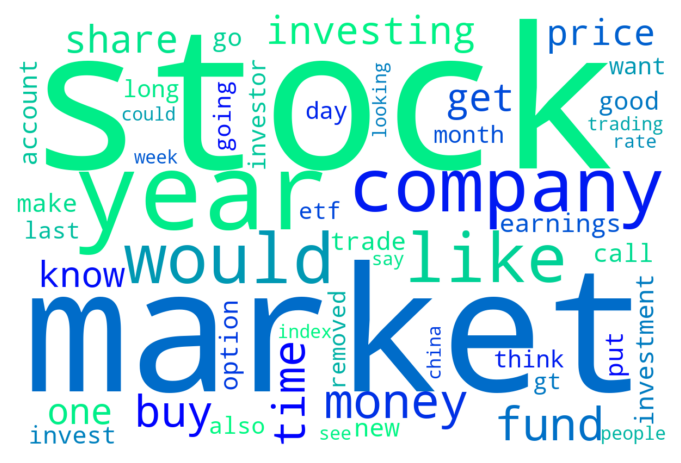

In [109]:
cloud = WordCloud(width=1200, 
                  height=800, 
                  background_color="white",
                  colormap="winter_r").generate_from_frequencies(frequencies=words_d)

plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Comments:
- The word cloud in this case is not very helpful in helping to classify the reddit posts, but it is neverthess less good to know that "stock" and "markets" appear the most frequent within this bag-of-words.

#### 7.3.2 Using TfidfVectorizer (with new excluded words)

In [110]:
# Reinstantiating TVEC
tvec = TfidfVectorizer(analyzer = "word",
                       tokenizer = None,
                       preprocessor = None,
                       stop_words = add_excluded_words,
                       max_features = 2000)

In [111]:
# Fit_transform on our X_train dataset
X_train_tvec_features = tvec.fit_transform(X_train_tvec)
X_test_tvec_features = tvec.transform(X_test_tvec)

In [112]:
# Converting to numpy array for easier working
X_train_tvec_features = X_train_tvec_features.toarray()

In [113]:
X_train_tvec_features[:3]   # New array format is correct

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.10660173, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

#### 7.3.3 Comments:
- Two vectorizers (CVEC & TVEC) have been implemented and processed for our project.
- Additional non-relevant words in the corpus has been removed (see section 7.2.1).
- Classification models can now be applied to these two sparse matrixes.

### 7.4 Testing of Logistic Regression classification (using default word vectorizing parameters)
Using Logistic Regression, we will now attemp to classify our CVEC and TVEC processed bag-of-words

In [114]:
# Importing the libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

#### 7.4.1 Logistic Regression on default CVEC data

In [115]:
LogReg = LogisticRegression()

In [116]:
# Fitting LogReg to the CVEC processed data
LogReg.fit(X_train_cvec_features, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [117]:
# Cross validation the optimized training set
result = cross_val_score(LogReg, X_train_cvec_features, y_train, cv=5, n_jobs=-1)

print(f"The cross_val training scores are {result}")
print(f"The mean score is {result.mean()}")

# Training score using the optimized model
LogReg.score(X_train_cvec_features, y_train)

The cross_val training scores are [0.85365144 0.84826884 0.84257238 0.85333915 0.85333915]
The mean score is 0.8502341940846991


0.882183489975849

In [118]:
# Test score using the optimized model
LogReg.score(X_test_cvec_features, y_test)

0.8494806164709078

#### Comments: CVEC/LogReg (default parameters)
- Our naive LogReg model is able to give an accuracy score of **0.882** on our training data.
- Our naive LogReg model is able to give an accuracy socre of **0.849** on our test data.

#### 7.4.2 Logistic Regression on default TVEC data

In [119]:
# Fitting LogReg to the TVEC processed data
LogReg.fit(X_train_tvec_features, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [120]:
# Cross validation the optimized training set
result = cross_val_score(LogReg, X_train_tvec_features, y_train, cv=5, n_jobs=-1)

print(f"The cross_val training scores are {result}")
print(f"The mean score is {result.mean()}")

The cross_val training scores are [0.86354379 0.85801571 0.84941074 0.85377564 0.85552161]
The mean score is 0.8560534974683671


In [121]:
# Training score using the optimized model
LogReg.score(X_train_tvec_features, y_train)

0.87682951668752

In [122]:
# Test score using the optimized model
LogReg.score(X_test_tvec_features, y_test)

0.8610224726729581

#### Comments: TVEC/LogReg (default parameters)
- Our naive LogReg model is able to give an accuracy score of **0.877** on our training data.
- Our naive LogReg model is able to give an accuracy socre of **0.861** on our test data.

### 7.5 Testing of Logistic Regression classification (with GridSearchCV vectorizer tuning)

#### 7.5.1 Setting up the pipeline

In [123]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [124]:
# Setting up a pipeline (cvec --> lr)
pipe1 = Pipeline([("cvec", cvec), ("LogReg", LogisticRegression())])
pipe2 = Pipeline([("tvec", tvec), ("LogReg", LogisticRegression())])

In [125]:
# Fitting the pipe model
pipeline1 = pipe1.fit(X_train_cvec, y_train)   # Fitting to the train_cvec
pipeline2 = pipe2.fit(X_train_tvec, y_train)   # Fitting to the train_tvec

#### 7.5.2 Using GridSearchCV to get the most optimized CVEC parameters

In [126]:
# CVEC processed dataset
pipe_params = {
    'cvec__max_features': [2000, 4000, 6000],
    'cvec__min_df': [2, 3, 4],
    'cvec__max_df': [.85, .90, .95],
    'cvec__ngram_range': [(1,1), (1,2)]
}
gs = GridSearchCV(pipeline1, param_grid=pipe_params, cv=5, n_jobs=-1)
gs.fit(X_train_cvec, y_train)
print(f'The best score of GridSearchCV is {gs.best_score_}')
print(f'The most optimal parameters are {gs.best_params_}')

The best score of GridSearchCV is 0.8554427212151191
The most optimal parameters are {'cvec__max_df': 0.85, 'cvec__max_features': 6000, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 1)}


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


#### 7.5.3 Applying LogReg with optimized CVEC parameters
- max_features = 6000
- min_df = 2
- max_df = 0.85
- ngram_range = (1,1)

In [127]:
cvec = CountVectorizer(analyzer="word",
                       tokenizer=None,
                       preprocessor=None,
                       ngram_range=(1,1),
                       max_features=6000,
                       min_df=2,
                       max_df=0.85,
                       stop_words=add_excluded_words)

In [128]:
# Fit_transform our X_train dataset using the most optimal parameters
X_train_cvec_features2 = cvec.fit_transform(X_train_cvec)
X_test_cvec_features2 = cvec.transform(X_test_cvec)

In [129]:
# Fitting LogReg to the optimized training data
LogReg.fit(X_train_cvec_features2, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [130]:
# Cross validation the optimized training set
cross2 = cross_val_score(LogReg, X_train_cvec_features2, y_train, cv=5, n_jobs=-1)
print(f"The mean score is {cross2}")
print(f"The mean score is {cross2.mean()}")

The mean score is [0.86194356 0.85408787 0.84242689 0.86090499 0.85697658]
The mean score is 0.8552679752241306


In [131]:
# Training score using the optimized model
LogReg.score(X_train_cvec_features2, y_train)

0.912328687403614

In [132]:
# Test score using the optimized model
LogReg.score(X_test_cvec_features2, y_test)

0.8576957023558965

#### Comments: CVEC/LogReg (optimized parameters)

- With optimized CVEC parameters, a new test accuracy score of **0.858** was obtained. This is better than the old test accuracy of **0.849** with default parameters.

#### 7.5.4 Using GridSearchCV to get the most optimized TVEC parameters

In [133]:
# TVEC processed dataset
pipe_params = {
    'tvec__max_features': [2000, 4000, 6000],
    'tvec__min_df': [2, 3, 4],
    'tvec__max_df': [.85, .90, .95],
    'tvec__ngram_range': [(1,1), (1,2)]
}
gs = GridSearchCV(pipeline2, param_grid=pipe_params, cv=5, n_jobs=-1)
gs.fit(X_train_tvec, y_train)
print(f'The best score of GridSearchCV is {gs.best_score_}')
print(f'The most optimal parameters are {gs.best_params_}')

The best score of GridSearchCV is 0.8639683417231646
The most optimal parameters are {'tvec__max_df': 0.85, 'tvec__max_features': 6000, 'tvec__min_df': 2, 'tvec__ngram_range': (1, 2)}


#### 7.5.5 Applying LogReg with optimized TVEC parameters
- max_features = 6000
- min_df = 2
- max_df = 0.85
- ngram_range = (1,2)

In [134]:
tvec = TfidfVectorizer(analyzer="word",
                       tokenizer=None,
                       preprocessor=None,
                       ngram_range=(1,2),
                       max_features=6000,
                       min_df=2,
                       max_df=0.85,
                       stop_words=add_excluded_words)

In [135]:
# Fit_transform our X_train dataset using the most optimal parameters
X_train_tvec_features2 = tvec.fit_transform(X_train_tvec)
X_test_tvec_features2 = tvec.transform(X_test_tvec)

In [136]:
# Fitting LogReg to the optimized training data
LogReg.fit(X_train_tvec_features2, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [137]:
# Cross validation the optimized training set
cross3 = cross_val_score(LogReg, X_train_tvec_features2, y_train, cv=5, n_jobs=-1)
print(f"The mean score is {cross3}")
print(f"The mean score is {cross3.mean()}")

The mean score is [0.86834449 0.86470759 0.85843154 0.86352393 0.86556089]
The mean score is 0.8641136897401338


In [138]:
# Training score using the optimized model
LogReg.score(X_train_tvec_features2, y_train)

0.8932697064043996

In [139]:
# Test score using the optimized model
LogReg.score(X_test_tvec_features2, y_test)

0.8678117998506348

#### Comments: TVEC/LogReg (optimized parameters)

- With optimized TVEC parameters, a new test accuracy score of **0.868** was obtained. This is negligibly better than the old test accuracy of **0.861** with default TVEC parameters.
- As TVEC/LogReg performs the best, it will be used for subsequent analysis.

### 7.6 Naive Bayes classification (using optimized CVEC/TVEC parameters)
- CVEC comprises of integers, hence MultinomialNB will be used for classification
- TVEC comprises of floats, therefore GaussianNB will be usef for classification

#### 7.6.1 Setting up the model

In [140]:
# Importing the models
from sklearn.naive_bayes import MultinomialNB, GaussianNB

In [141]:
# Instantiating the models
mul_nb = MultinomialNB()
gau_nb = GaussianNB()

In [142]:
# Fitting the models using default CVEC/TVEC parameters
model_cvec = mul_nb.fit(X_train_cvec_features2.toarray(), y_train)
model_tvec = gau_nb.fit(X_train_tvec_features2.toarray(), y_train)

#### 7.6.2 Evaluating the Naive Bayes classification

In [143]:
# Score our model on the training set
print(f"The training NB score on the CVEC model is {model_cvec.score(X_train_cvec_features2.toarray(), y_train)}")
print(f"The training NB score on the TVEC modesl is {model_tvec.score(X_train_tvec_features2.toarray(), y_train)}")

The training NB score on the CVEC model is 0.8383332848371985
The training NB score on the TVEC modesl is 0.8596327872668549


In [144]:
# Score our model on the test set
print(f"The test NB score on the CVEC model is {model_cvec.score(X_test_cvec_features2.toarray(), y_test)}")
print(f"The test NB score on the TVEC model is {model_tvec.score(X_test_tvec_features2.toarray(), y_test)}")

The test NB score on the CVEC model is 0.8280263425894494
The test NB score on the TVEC model is 0.8278226627741191


#### Comments:
- NB classification scores are much lower than those of Logistic Regression.
- Therefore, TVEC/LogReg which gives the best score will be used for our classification.

## 8. Analysis of classification results
- It has been determined that the CVEC/LogReg gives the mose accurate classification our datasets.
- A summary of the prior classification results are as follows (accuracy score):

|Model|Train_accuracy|Test_accuracy
|:-----|--------------|-------------|
|CVEC/LogReg (default)|0.882|0.849|
|TVEC/LogReg (default)|0.877|0.861|
|CVEC/LogReg (GridCV)|0.912|0.858|
|TVEC/LogReg (GridCV)|0.893|0.868|
|CVEC/MultiNB (GridCV)|0.838|0.828|
|TVEC/GaussNB (GridCV)|0.860|0.828|

### 8.1 Creating the Confusion Matrix of our reddit classifier

In [145]:
# Importing the library
from sklearn.metrics import confusion_matrix

In [146]:
# Using our model to predict y_test
y_hat = LogReg.predict(X_test_tvec_features2)

In [147]:
# Generating the Confusion Matrix
cm = confusion_matrix(y_test, y_hat)
cm

array([[6425,  998],
       [ 949, 6357]])

In [148]:
# Saving the TN/FP/FN/TP results
tn, fp, fn ,tp = cm.ravel()
cm.ravel()

array([6425,  998,  949, 6357])

In [149]:
# Creating a confusion_matrix DataFrame for easier viewing
cm_df = pd.DataFrame(cm, columns = ["pred r/inv", "pred r/wsb"], index=["actual r/inv", "actual r/wsb"])
cm_df

,pred r/inv,pred r/wsb
actual r/inv,6425,998
actual r/wsb,949,6357


#### 8.1.1 Calculating the Sensitivity of our model (the true-positive rate)
- Out of a 100 x r/wallstreetbets, or 100 x r/investing posts, how many posts can our model correctly classify them?

In [150]:
sensitivity = round(tp/(tp+fn),4)
print(f"Our model's Sensitivity is: {sensitivity}")
print(f"Out of 100 r/wsb posts, our model is able to correctly classify {int(sensitivity*100)} of them.")

Our model's Sensitivity is: 0.8701
Out of 100 r/wsb posts, our model is able to correctly classify 87 of them.


#### 8.1.2 Calculating the Specificity of our model (the true-negative rate)

In [151]:
specificity = round(tn/(tn+fp),4)
print(f"Our model's Specificity is: {specificity}")
print(f"Out of 100 r/inv posts, our model is able to correctly classify {int(specificity*100)} of them.")

Our model's Specificity is: 0.8656
Out of 100 r/inv posts, our model is able to correctly classify 86 of them.


#### Comments:
- Overall, our model is able to classify reddit posts into their correct r/wallstreetbets and r/investing subreddits very well.

### 8.2 Generating a ROC curve

In [152]:
# Using a library which adds plotting functionality to scikit-learn objects
import scikitplot as skplt
from sklearn.metrics import roc_auc_score

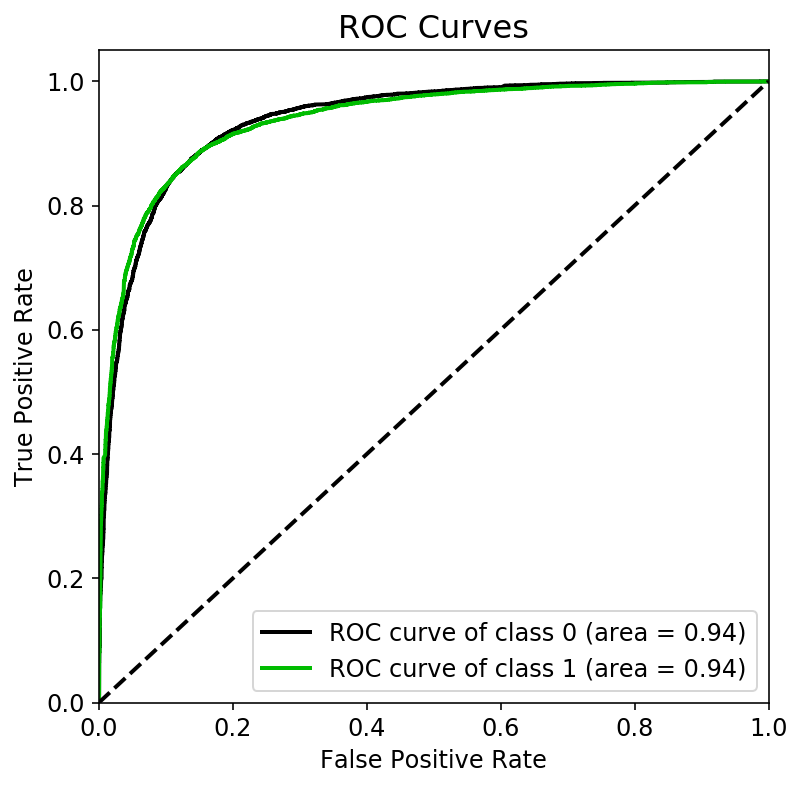

In [153]:
# Ground truth labels (y_test)
y_true = y_test

# Predicted probabilities generated by sklearn classifier (y_hat)
y_probas = LogReg.predict_proba(X_test_tvec_features2)

skplt.metrics.plot_roc(y_true, y_probas,
                       plot_macro=False,
                       plot_micro=False,
                       figsize=(6,6),
                       title_fontsize=16,
                       text_fontsize=12)
plt.show()
# Class 0 is r/investing
# Class 1 is r/wallstreetbets

#### Comments:
- Our CVEC/LogReg model is able to achieve an ROC AUC of 0.94 for both r/wallstreetbets and r/investing.
- This means that our model is able to properly classify the message post origin between these two different subreddits.

### 8.3 The most important words that distinguishes between r/wallstreetbets and r/investing posts

In [154]:
# Saving the logistic regression coefficients
log_coefficients = pd.Series(LogReg.coef_[0])   # To create 1D array

In [155]:
# Saving the vocabulary list and word count
vocab_train2 = tvec.get_feature_names()

In [156]:
# Creating a dataframe of vocabulary and their coefficients
key_classifier_words = pd.DataFrame([vocab_train2, log_coefficients],
                                    index=["words", "log_coeff"]).T
key_classifier_words.head(10)

,words,log_coeff
0,aa,-1.01461
1,aapl,0.308939
2,ab,-0.842129
3,abc,-0.551502
4,ability,0.165634
5,able,-0.951565
6,able find,-0.486251
7,able get,0.0407667
8,able make,-0.0116908
9,abroad,0.129582


In [157]:
# Transforming the natural log
key_classifier_words["coeffs"] = key_classifier_words["log_coeff"].apply(lambda x: np.exp(x))

In [158]:
key_classifier_words = key_classifier_words.sort_values(by=["coeffs"], ascending=False)

In [159]:
# Top 30 r/wallstreetbets words
key_classifier_words.head(30)

,words,log_coeff,coeffs
5923,wsb,6.25217,519.138965
5245,tendies,5.96053,387.815070
5978,yolo,5.74414,312.356172
1279,dd,5.62978,278.600804
4735,shit,5.47178,237.882328
365,autists,5.35944,212.605526
363,autist,4.59696,99.182817
753,call,4.45505,86.060565
4418,retard,4.3986,81.336866
4153,put,4.18376,65.612249


In [160]:
# Top 30 r/investing words
key_classifier_words.tail(30).sort_values(by=["coeffs"], ascending=True)

,words,log_coeff,coeffs
2709,investing,-6.23027,0.001969
2722,investment,-5.5934,0.003722
943,cnbc,-4.75161,0.008638
2737,investor,-4.53362,0.010742
1441,dividend,-4.07222,0.017039
2696,invest,-4.05391,0.017354
1714,etf,-3.99855,0.018342
5648,vanguard,-3.93814,0.019484
5857,wondering,-3.79344,0.022518
2122,fund,-3.47373,0.031001


#### Comments:
- Based on the key word lists, it can be observed that the different subreddit users have different investment priorities.
- Users in r/investing prefer traditional approaches, while r/wallstreetbets are impulsive and irrational.

### 8.4 Using the type of stock portfolio to distinguish between r/wallstreetbets and r/investing posts
- Certain key words are enriched for r/wallstreetbets posts, while other key words are found mainly in r/investing.
- The question is are there different stock ticker names (from S&P500) between the two subreddits?

In [161]:
# Obtaining all the S&P500 stock tickers
spx500 = pd.read_csv("./sp500_tickers.csv")

In [162]:
spx500.head()

,spx_ticker
0,MSFT
1,AAPL
2,AMZN
3,FB
4,BRK.B


In [163]:
# Convert SPX500 ticker prices to lowercase
spx500["spx_ticker"] = spx500["spx_ticker"].apply(lambda text: text.lower())
spx500.head()

,spx_ticker
0,msft
1,aapl
2,amzn
3,fb
4,brk.b


#### 8.4.1 Displaying the top 10 r/wallstreetbets favoured stocks

In [164]:
key_classifier_words.loc[key_classifier_words["words"].isin(spx500["spx_ticker"])].head(10)

,words,log_coeff,coeffs
1279,dd,5.62978,278.600804
5272,tgt,2.362,10.612130
3611,nov,1.92463,6.852625
345,atvi,1.41981,4.136332
5554,ulta,1.41429,4.113557
2186,ge,1.4081,4.088194
174,amd,1.11981,3.064279
5799,well,0.879529,2.409765
1402,dis,0.840638,2.317845
3575,nflx,0.746436,2.109469


#### Comments:
Stocks favoured by r/wallstreetbets posters:
- ATVI (Activision Blizzard)
- ULTA (Ulta Beauty)
- GE (General Electric)
- AMD (Advanced Micro Devices)
- DIS (Disney)
- NFLX (Netflix)

#### 8.4.2 Displaying the top 10 r/investing favoured stocks

In [165]:
temp = key_classifier_words.loc[key_classifier_words["words"].isin(spx500["spx_ticker"])].tail(10)
temp.sort_values(by=["coeffs"], ascending=True)

,words,log_coeff,coeffs
2289,googl,-1.94169,0.143462
1141,cost,-1.54536,0.213234
3458,msci,-1.17558,0.308640
3876,pg,-1.15719,0.314369
1527,ea,-1.01486,0.362452
1283,de,-0.971526,0.378505
2517,ibm,-0.885528,0.412496
2842,khc,-0.819902,0.440475
3621,nvda,-0.680445,0.506392
5604,ups,-0.670578,0.511413


#### Comments:
Stocks favoured by r/investing posters:
- GOOGL (Alphabet)
- COST (Costco)
- MSCI (previously Morgan Stanley Capital Investment)
- PG (Proctor & Gamble)
- EA (Electronic Arts)

### 8.5 Why do posts get misclassified?
- By understanding why some reddit posts gets misclassified will enable us to improve our classification models.
- We will now examine these wrongly classified posts.

In [166]:
# Displaying the confusion matrix
cm_df

,pred r/inv,pred r/wsb
actual r/inv,6425,998
actual r/wsb,949,6357


#### 8.5.1 Displaying r/investing posts which were wrongly classified at r/wallstreetbets (i.e. a false positive)

In [167]:
false_positives = X_test[(y_test == 0) & (y_hat == 1)]
false_positives.head()

,title_text
29268,td ameritrade offer commission free trade star...
26260,twitter stock put two cent someone please tell...
46659,ok new reddit investing term like tendie autis...
36057,good sense stock go bad buy sell dozen time ma...
40382,sec twitter rule elon see page http asset bwbx...


In [168]:
# Printing the first 5 false-positive posts (i.e r/investing classified as r/wallstreetbets)
# Using the row indexes
for i in [29268, 26260, 46659, 36057, 40382]:
    print(f'#{i} {false_positives["title_text"][i]}\n')

#29268 td ameritrade offer commission free trade starting day schwab fast got email look like plan start v schwab

#26260 twitter stock put two cent someone please tell twitter dropped hard missed earnings cent drop one day share sol anyway good time buy twitter stock sell

#46659 ok new reddit investing term like tendie autist never heard

#36057 good sense stock go bad buy sell dozen time make little profit

#40382 sec twitter rule elon see page http asset bwbx io document user iqjwhbfdfxiu rn rasrzva k v



#### Comments:
- The third post #46659 can be attributed to the inclusion of key r/wallstreetbets words such as "tendie", "autist".
    - Its context however clearly shows that it is a r/investing post that is referencing r/wallstreetbets words.
- For the other posts, due to its "general" sounding nature, it may have been difficult for the model to accurately classify them into the correct subreddit.

#### 8.5.2 Displaying r/wallstreetbets posts which were wrongly classified at r/investing (i.e. a false negative)

In [169]:
false_negatives = X_test[(y_test == 1) & (y_hat == 0)]
false_negatives.head()

,title_text
1232,gain almost year watch buffet
18054,investing chinese money exodus many wealthy ch...
10849,already multi year bear market probably zoom l...
12689,china longer largest holder u debt china russi...
3180,fair value accuracy obviously nobody predict e...


In [170]:
# Printing the first 5 false-negative posts (i.e r/wallstreetbets classified as r/investing)
# Using the row indexes
for i in [1232, 18054, 10849, 12689, 3180]:
    print(f'#{i} {false_negatives["title_text"][i]}\n')

#1232 gain almost year watch buffet

#18054 investing chinese money exodus many wealthy chinese people transferring huge amount money china primarily canada u recommendation take advantage situation investing certain bank american canadian brand appeal wealthy chinese people

#10849 already multi year bear market probably zoom little first happened recently shitcoins peaked december btc usd world stock market peaked january vt amp p valuation level also peaked january http ycharts com indicator cyclically adjusted pe ratio http ycharts com indicator cyclically adjusted pe ratio unicorn peaked uber treasury tlt ief usd uup either peaking right still go little higher indicator tell u manufacturing pmi great http tradingeconomics com united state manufacturing pmi http tradingeconomics com united state manufacturing pmi oecd world leading indicator great http data oecd org leadind composite leading indicator cli htm http data oecd org leadind composite leading indicator cli htm consumer s

#### Comments:
- The first and second posts #1232 and #18054 can be attributed to the inclusion of key r/investing words such as "investing", "buffet", "year", "bear market".
- For the other posts, the reason why they are wrongly classified is still unclear.

## 9. Conclusion and Recommendations

### 9.1 Key Findings
We have successfully developed a NLP classifier based on CountVectorization and LogisticRegression that is able to accurately classify posts into their respective r/wallstreetbets or r/investing subreddits.
- Enrichments of key words (or slang) between the two subreddits enables the model to function robustly during training and testing.
- NLP allows for additional insights into the subreddit's demographic profile and habits, which is useful for targeted marking strategies.
- Stock trading preferences based on the subreddit's frequently occuring stock tickers can also reveal insights into their trading strategy/plans.
- Our NLP model fails to distinguish the context of messages, hence leading to wrong classification. The model also fails when it appears too "general" in nature, leading to an improper classification.

### 9.2 Recommendations
As with all models, further improvements and refinements have to be continuously made before and during production. There are three areas which future efforts can be directed towards:

**1) Reduction of noise words**:
- Additional words arising from word artifacts (e.g. Internet links, html-coding, file.types) can be removed during vectorization.
- Words that appear too "general" in nature can also be considered for removal (e.g. "stock"), but a better approach would be to string words together to better understand the context.

**2) Determining how current Reddit posts forecase future trends**
- As posts are made in real-time, the context can also differ based on on-going market trends.
- Understanding the market sentiment can be helpful in predicting future trends.

**3) Capturing of image texts**
- While not so for r/investing, >50% of r/wallstreetbets posts are actually images without a message body.
- A majority are meme posts surrounding an ongoing event:
    - *Case in point:* A controversial Peloton advertisement led to a 9% drop in stock price. As a result, there were many meme images and videos posted on r/wallstreetbets. OCR on the images could enable the capturing of new information.